In [90]:
import numpy as np
import pandas as pd
import bnlearn as bn
from sklearn.metrics import accuracy_score

In [91]:
df = pd.read_csv('wine.data')

In [92]:
df.head()

,label,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [93]:
discrete = pd.DataFrame()

## Discretization

In [94]:
for column in df.columns:
    # Check if the column is numerical (excluding the 'label' column)
    if pd.api.types.is_numeric_dtype(df[column]) and column not in ['label', 'magnesium']:
        # Discretize the column
        discrete[f'{column}'] = pd.cut(df[column], bins=4, labels=False)

discrete['magnesium'] = df['magnesium']
discrete['label'] = df['label']
discrete.head()

,alcohol,malicacid,ash,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline,magnesium,label
0,3,0,2,1,2,2,1,2,1,1,3,2,127,1
1,2,0,1,0,2,2,0,1,1,1,3,2,100,1
2,2,1,2,1,2,2,1,3,1,1,2,2,101,1
3,3,0,2,1,3,2,0,2,2,1,3,3,113,1
4,2,1,3,2,2,1,1,1,1,1,2,1,118,1


In [95]:
discrete.shape

(178, 14)

## Network A

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


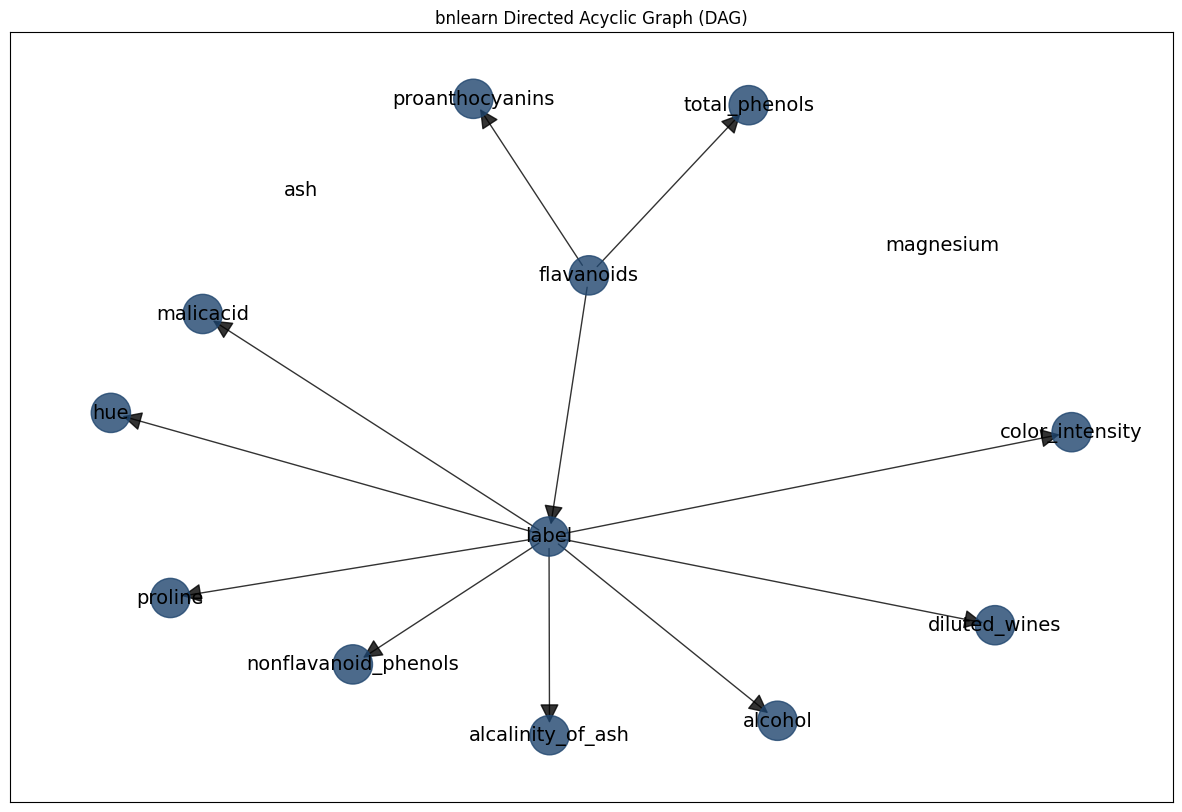

In [96]:
# Learn the structure of the Bayesian network
networkA = bn.structure_learning.fit(discrete)

# Visualize the Bayesian network
G = bn.plot(networkA)


In [97]:
networkA = bn.parameter_learning.fit(networkA, discrete)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of flavanoids:
+---------------+----------+
| flavanoids(0) | 0.263158 |
+---------------+----------+
| flavanoids(1) | 0.268251 |
+---------------+----------+
| flavanoids(2) | 0.254669 |
+---------------+----------+
| flavanoids(3) | 0.213922 |
+---------------+----------+
[bnlearn] >CPD of total_phenols:
+------------------+-----+---------------------+
| flavanoids       | ... | flavanoids(3)       |
+------------------+-----+---------------------+
| total_phenols(0) | ... | 0.24801587301587302 |
+------------------+-----+---------------------+
| total_phenols(1) | ... | 0.24801587301587302 |
+------------------+-----+---------------------+
| total_phenols(2) | ... | 0.24801587301587302 |
+------------------+-----+---------------------+
| total_phenols(3) | ... | 0.255952380952

In [98]:
query1 = bn.inference.fit(networkA, variables=['label'], evidence={'total_phenols': 1})
print(query1)
query1

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.328094 |
+----+---------+----------+
|  1 |       2 | 0.347809 |
+----+---------+----------+
|  2 |       3 | 0.324097 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.3281 |
+----------+--------------+
| label(2) |       0.3478 |
+----------+--------------+
| label(3) |       0.3241 |
+----------+--------------+


<DiscreteFactor representing phi(label:3) at 0x7ff78a149fa0>

# Network B (pruning)

In [99]:
discrete2 = discrete.drop(['ash','magnesium'], axis=1)

[bnlearn] >Warning: Computing DAG with 12 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


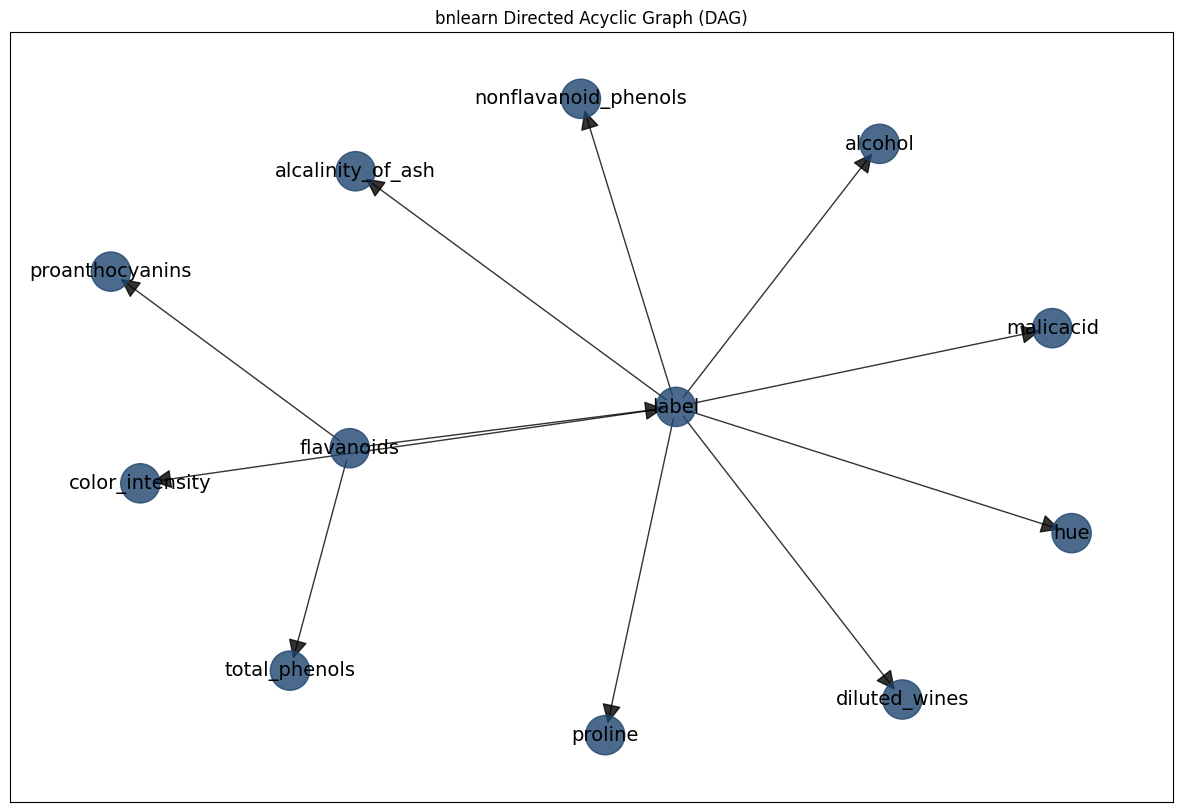

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.59203926, 0.85198999]),
  'malicacid': array([0.93846025, 0.27476662]),
  'alcalinity_of_ash': array([-0.45928562,  0.76613417]),
  'total_phenols': array([-0.59104673, -0.79778919]),
  'flavanoids': array([-0.47101028, -0.10130487]),
  'nonflavanoid_phenols': array([-0.00727966,  0.9929786 ]),
  'proanthocyanins': array([-0.95030001,  0.45176081]),
  'color_intensity': array([-0.89124208, -0.21123862]),
  'hue': array([ 0.97725498, -0.36719232]),
  'diluted_wines': array([ 0.63768463, -0.88830417]),
  'proline': array([ 0.04137845, -1.        ]),
  'label': array([0.1833468 , 0.02819898])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ff6b4092880>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'alcalinity_of_ash': {'node_color': '#1f456e', 'node_size': 800},
  'total_phenols':

In [100]:
# Hill-Climbing algorithm
networkB1 = bn.structure_learning.fit(discrete2, methodtype='hc', scoretype='bic')
bn.plot(networkB1)

[bnlearn] >Existing coordinates from <pos> are used.


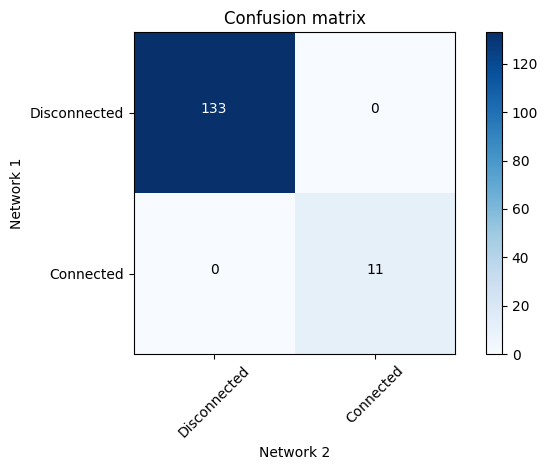

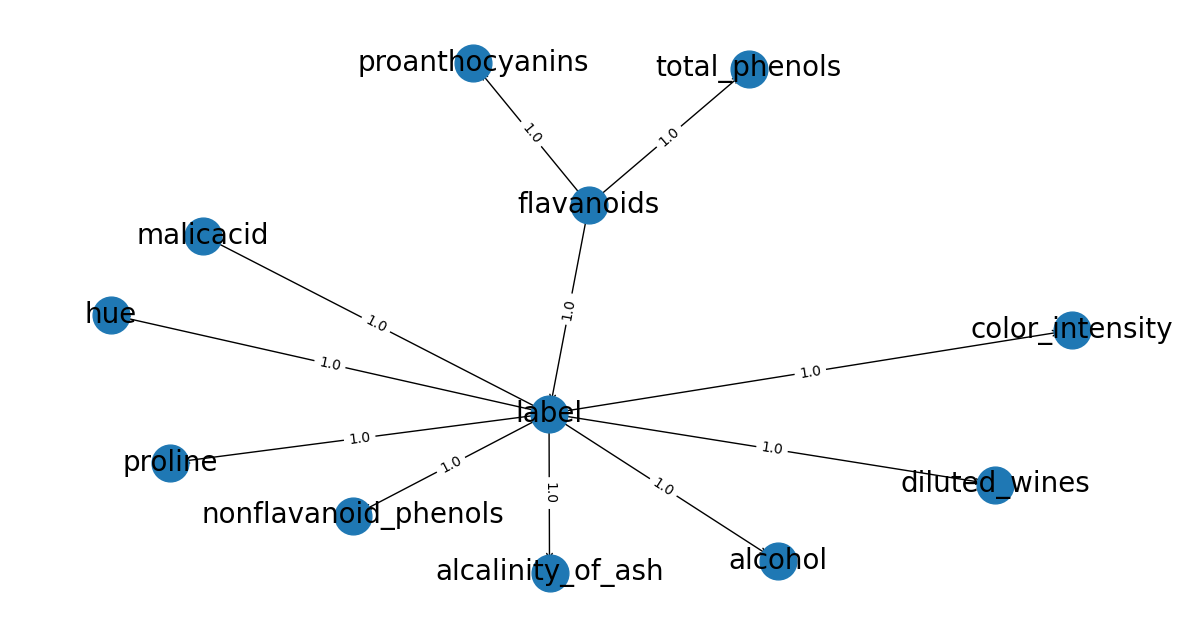

(array([[133,   0],
        [  0,  11]]),
 target                alcohol  malicacid  alcalinity_of_ash  total_phenols  \
 source                                                                       
 alcohol                     0          0                  0              0   
 malicacid                   0          0                  0              0   
 alcalinity_of_ash           0          0                  0              0   
 total_phenols               0          0                  0              0   
 flavanoids                  0          0                  0              1   
 nonflavanoid_phenols        0          0                  0              0   
 proanthocyanins             0          0                  0              0   
 color_intensity             0          0                  0              0   
 hue                         0          0                  0              0   
 diluted_wines               0          0                  0              0   
 proline  

In [101]:
bn.compare_networks(networkA, networkB1, pos=G['pos'])

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


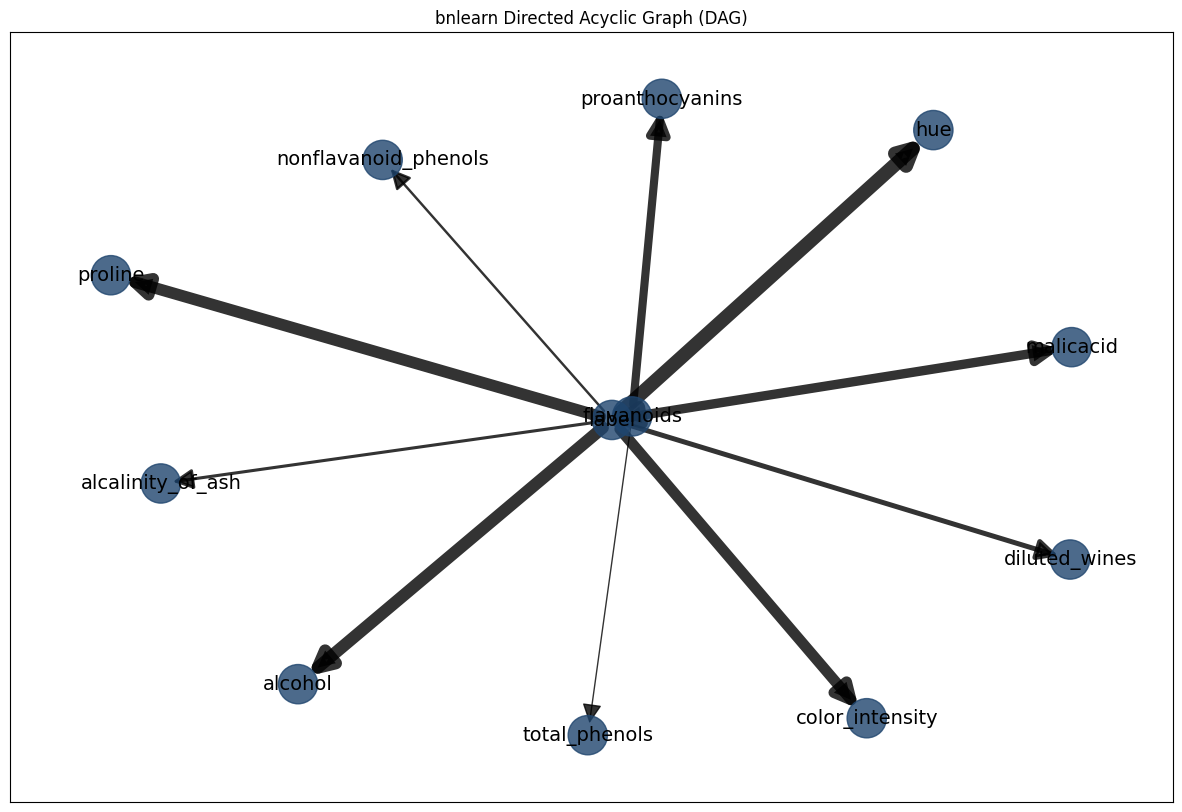

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([-0.62918961, -0.76055768]),
  'malicacid': array([0.90328809, 0.20611703]),
  'alcalinity_of_ash': array([-0.90105893, -0.18491132]),
  'total_phenols': array([-0.05520199, -0.90687757]),
  'flavanoids': array([0.03253353, 0.00745715]),
  'nonflavanoid_phenols': array([-0.46159038,  0.74316405]),
  'proanthocyanins': array([0.09147164, 0.91843642]),
  'color_intensity': array([ 0.49740785, -0.85826641]),
  'hue': array([0.62938618, 0.82872951]),
  'diluted_wines': array([ 0.90026245, -0.40303252]),
  'proline': array([-1.        ,  0.41243744]),
  'label': array([-0.00730883, -0.00269611])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ff6b8a4f070>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'alcalinity_of_ash': {'node_color': '#1f456e', 'node_size': 800},
  'total_phenols': {

In [102]:
# Compute edge strength using chi-square independence test
model_sl = bn.independence_test(networkB1, discrete)
bn.plot(model_sl)

In [103]:
networkB2 = networkB1['model'].remove_node('total_phenols')

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


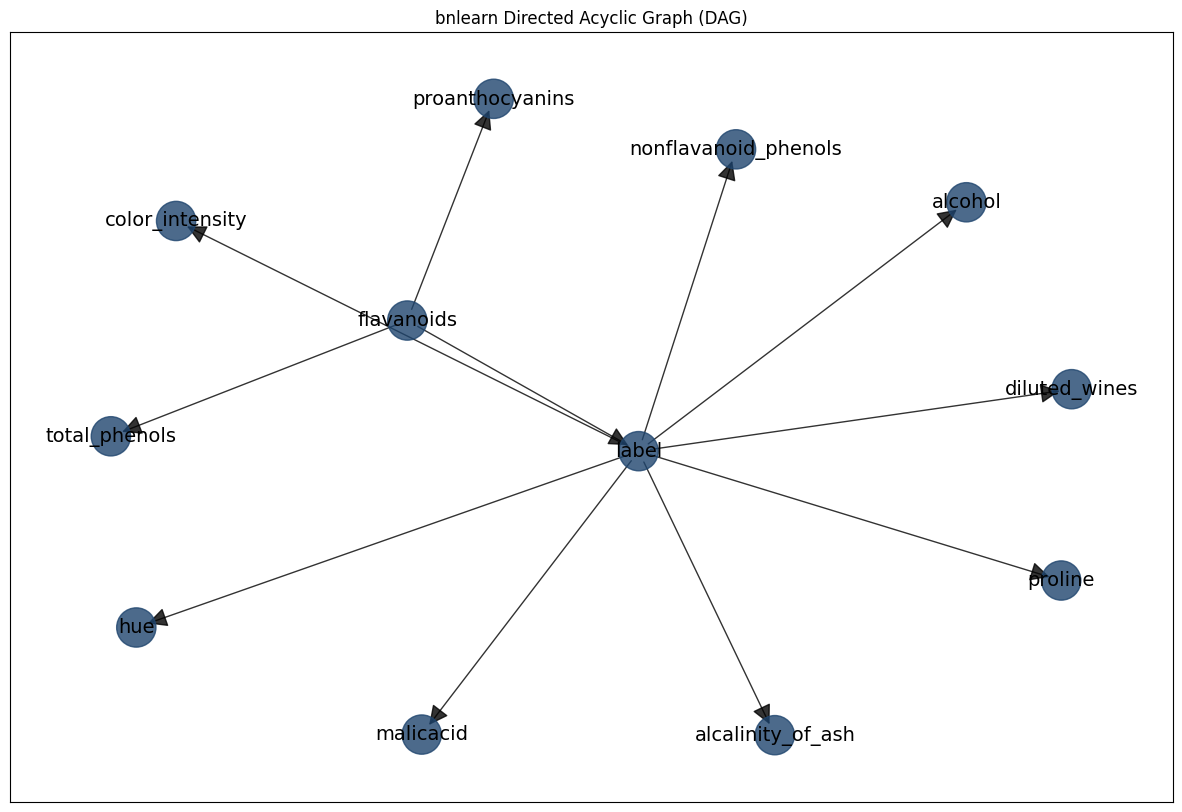

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.74239016, 0.64993112]),
  'malicacid': array([-0.31196201, -0.99808517]),
  'alcalinity_of_ash': array([ 0.37153684, -1.        ]),
  'total_phenols': array([-0.91373766, -0.07461832]),
  'flavanoids': array([-0.33992509,  0.28380716]),
  'nonflavanoid_phenols': array([0.29642463, 0.81382471]),
  'proanthocyanins': array([-0.17263579,  0.97024466]),
  'color_intensity': array([-0.78747058,  0.59205453]),
  'hue': array([-0.86452699, -0.66654641]),
  'diluted_wines': array([0.94609665, 0.07118325]),
  'proline': array([ 0.92591729, -0.52112395]),
  'label': array([ 0.10789257, -0.12067159])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ff789f84be0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'alcalinity_of_ash': {'node_color': '#1f456e', 'node_size': 800},
  'total_phenols':

In [104]:
bn.plot(networkB1)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


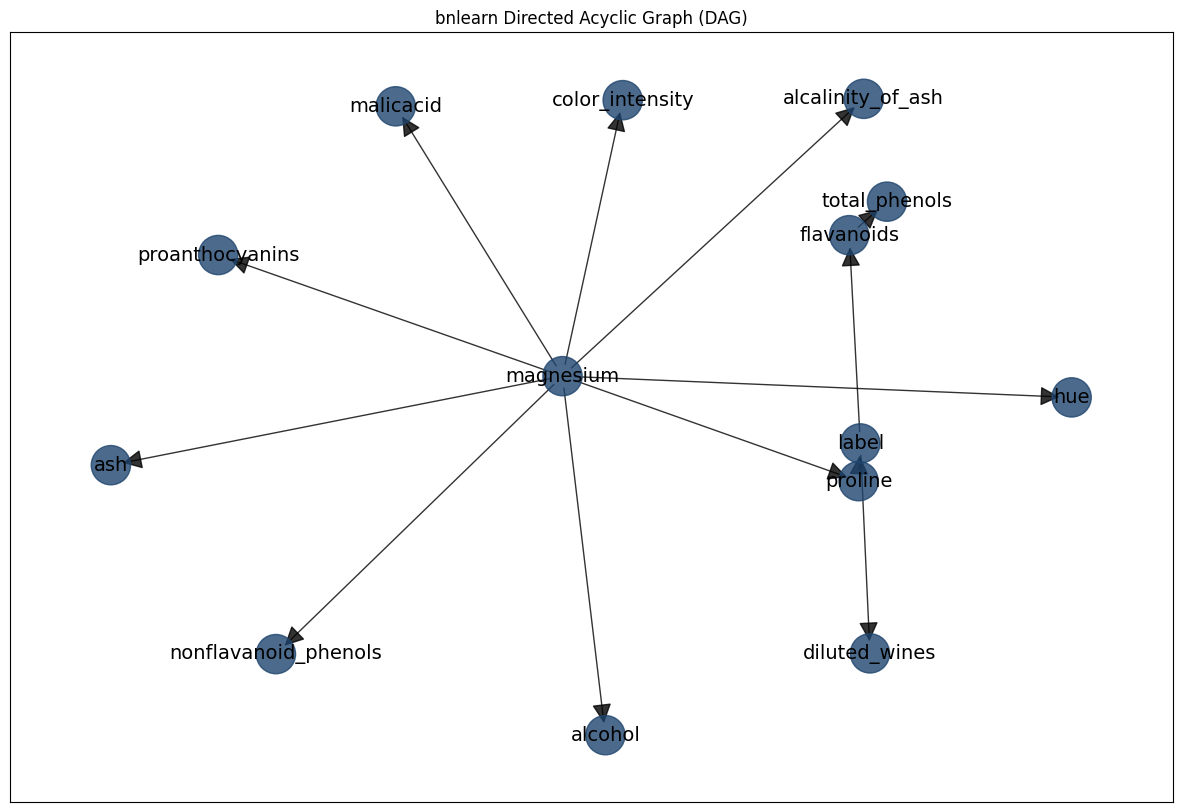

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of magnesium:
+----------------+-----------+
| magnesium(70)  | 0.0168658 |
+----------------+-----------+
| magnesium(78)  | 0.0185636 |
+----------------+-----------+
| magnesium(80)  | 0.0202614 |
+----------------+-----------+
| magnesium(81)  | 0.0168658 |
+----------------+-----------+
| magnesium(82)  | 0.0168658 |
+----------------+-----------+
| magnesium(84)  | 0.0185636 |
+----------------+-----------+
| magnesium(85)  | 0.0211103 |
+----------------+-----------+
| magnesium(86)  | 0.0253548 |
+----------------+-----------+
| magnesium(87)  | 0.0185636 |
+----------------+-----------+
| magnesium(88)  | 0.0270526 |
+----------------+-----------+
| magnesium(89)  | 0.0202614 |
+----------------+-----------+
| magnesium(90)  | 0.0194125 |
+----------------+-----------+
| 

In [105]:
networkB3 = bn.structure_learning.fit(discrete, methodtype='cl', scoretype='k2')
bn.plot(networkB3)
networkB3 = bn.parameter_learning.fit(networkB3, discrete)

In [106]:
networkB3 = bn.parameter_learning.fit(networkB3, discrete)

[datazets] >WARNING> Replacing existing CPD for magnesium
[datazets] >WARNING> Replacing existing CPD for nonflavanoid_phenols
[datazets] >WARNING> Replacing existing CPD for proline
[datazets] >WARNING> Replacing existing CPD for alcohol
[datazets] >WARNING> Replacing existing CPD for color_intensity
[datazets] >WARNING> Replacing existing CPD for malicacid
[datazets] >WARNING> Replacing existing CPD for ash
[datazets] >WARNING> Replacing existing CPD for proanthocyanins
[datazets] >WARNING> Replacing existing CPD for hue
[datazets] >WARNING> Replacing existing CPD for alcalinity_of_ash
[datazets] >WARNING> Replacing existing CPD for label
[datazets] >WARNING> Replacing existing CPD for flavanoids
[datazets] >WARNING> Replacing existing CPD for diluted_wines
[datazets] >WARNING> Replacing existing CPD for total_phenols


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of magnesium:
+----------------+-----------+
| magnesium(70)  | 0.0168658 |
+----------------+-----------+
| magnesium(78)  | 0.0185636 |
+----------------+-----------+
| magnesium(80)  | 0.0202614 |
+----------------+-----------+
| magnesium(81)  | 0.0168658 |
+----------------+-----------+
| magnesium(82)  | 0.0168658 |
+----------------+-----------+
| magnesium(84)  | 0.0185636 |
+----------------+-----------+
| magnesium(85)  | 0.0211103 |
+----------------+-----------+
| magnesium(86)  | 0.0253548 |
+----------------+-----------+
| magnesium(87)  | 0.0185636 |
+----------------+-----------+
| magnesium(88)  | 0.0270526 |
+----------------+-----------+
| magnesium(89)  | 0.0202614 |
+----------------+-----------+
| magnesium(90)  | 0.0194125 |
+----------------+-----------+
| magnesium(91)  | 0.0177147 |
+----------------+-----------+
| magnesium(92)  | 0.0202614 |
+----------------+-----------+
| magn

[bnlearn] >Existing coordinates from <pos> are used.


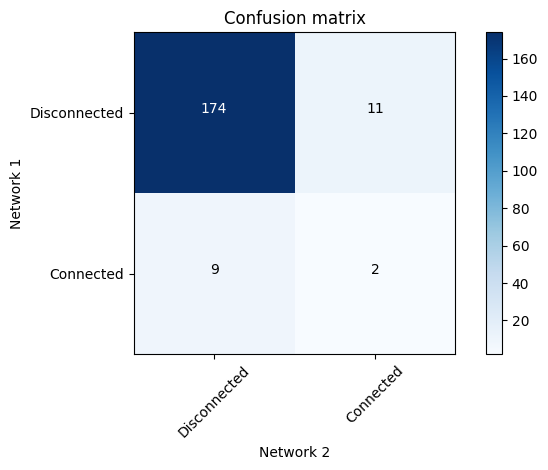

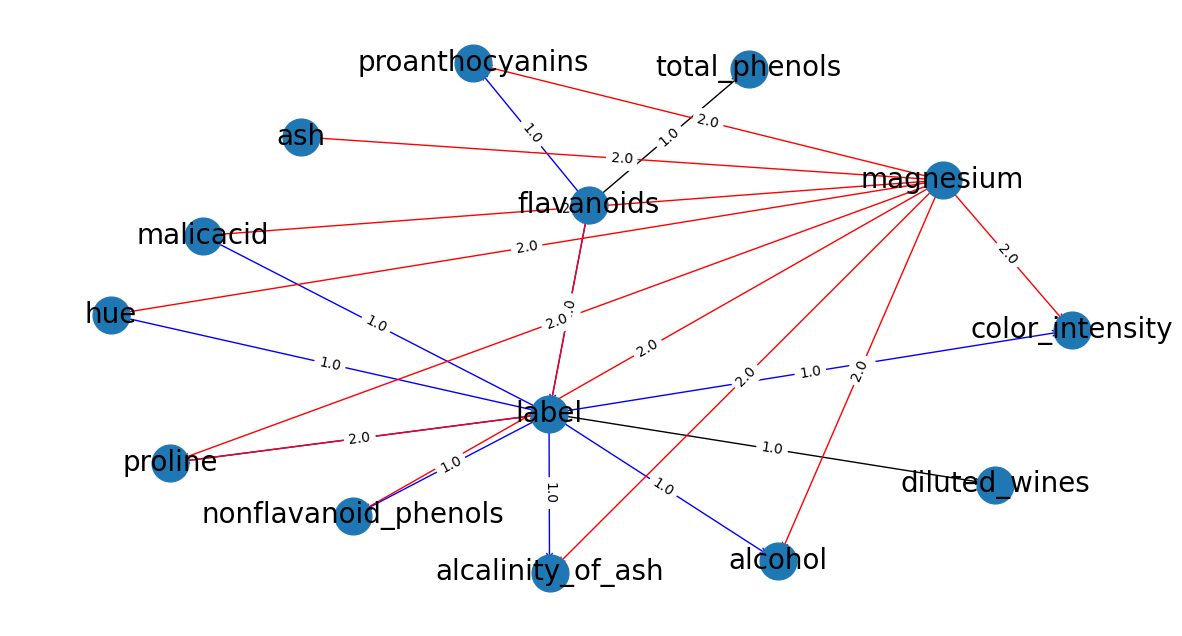

(array([[174,  11],
        [  9,   2]]),
 target                alcohol  malicacid  ash  alcalinity_of_ash  \
 source                                                             
 alcohol                     0          0    0                  0   
 malicacid                   0          0    0                  0   
 ash                         0          0    0                  0   
 alcalinity_of_ash           0          0    0                  0   
 total_phenols               0          0    0                  0   
 flavanoids                  0          0    0                  0   
 nonflavanoid_phenols        0          0    0                  0   
 proanthocyanins             0          0    0                  0   
 color_intensity             0          0    0                  0   
 hue                         0          0    0                  0   
 diluted_wines               0          0    0                  0   
 proline                     0          0    0               

In [107]:
bn.compare_networks(networkA, networkB3, pos=G['pos'])

## Network C

In [108]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('wine.data')

In [110]:
X = df.drop('label', axis=1)
Y = df['label']

In [111]:
X.head()

,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


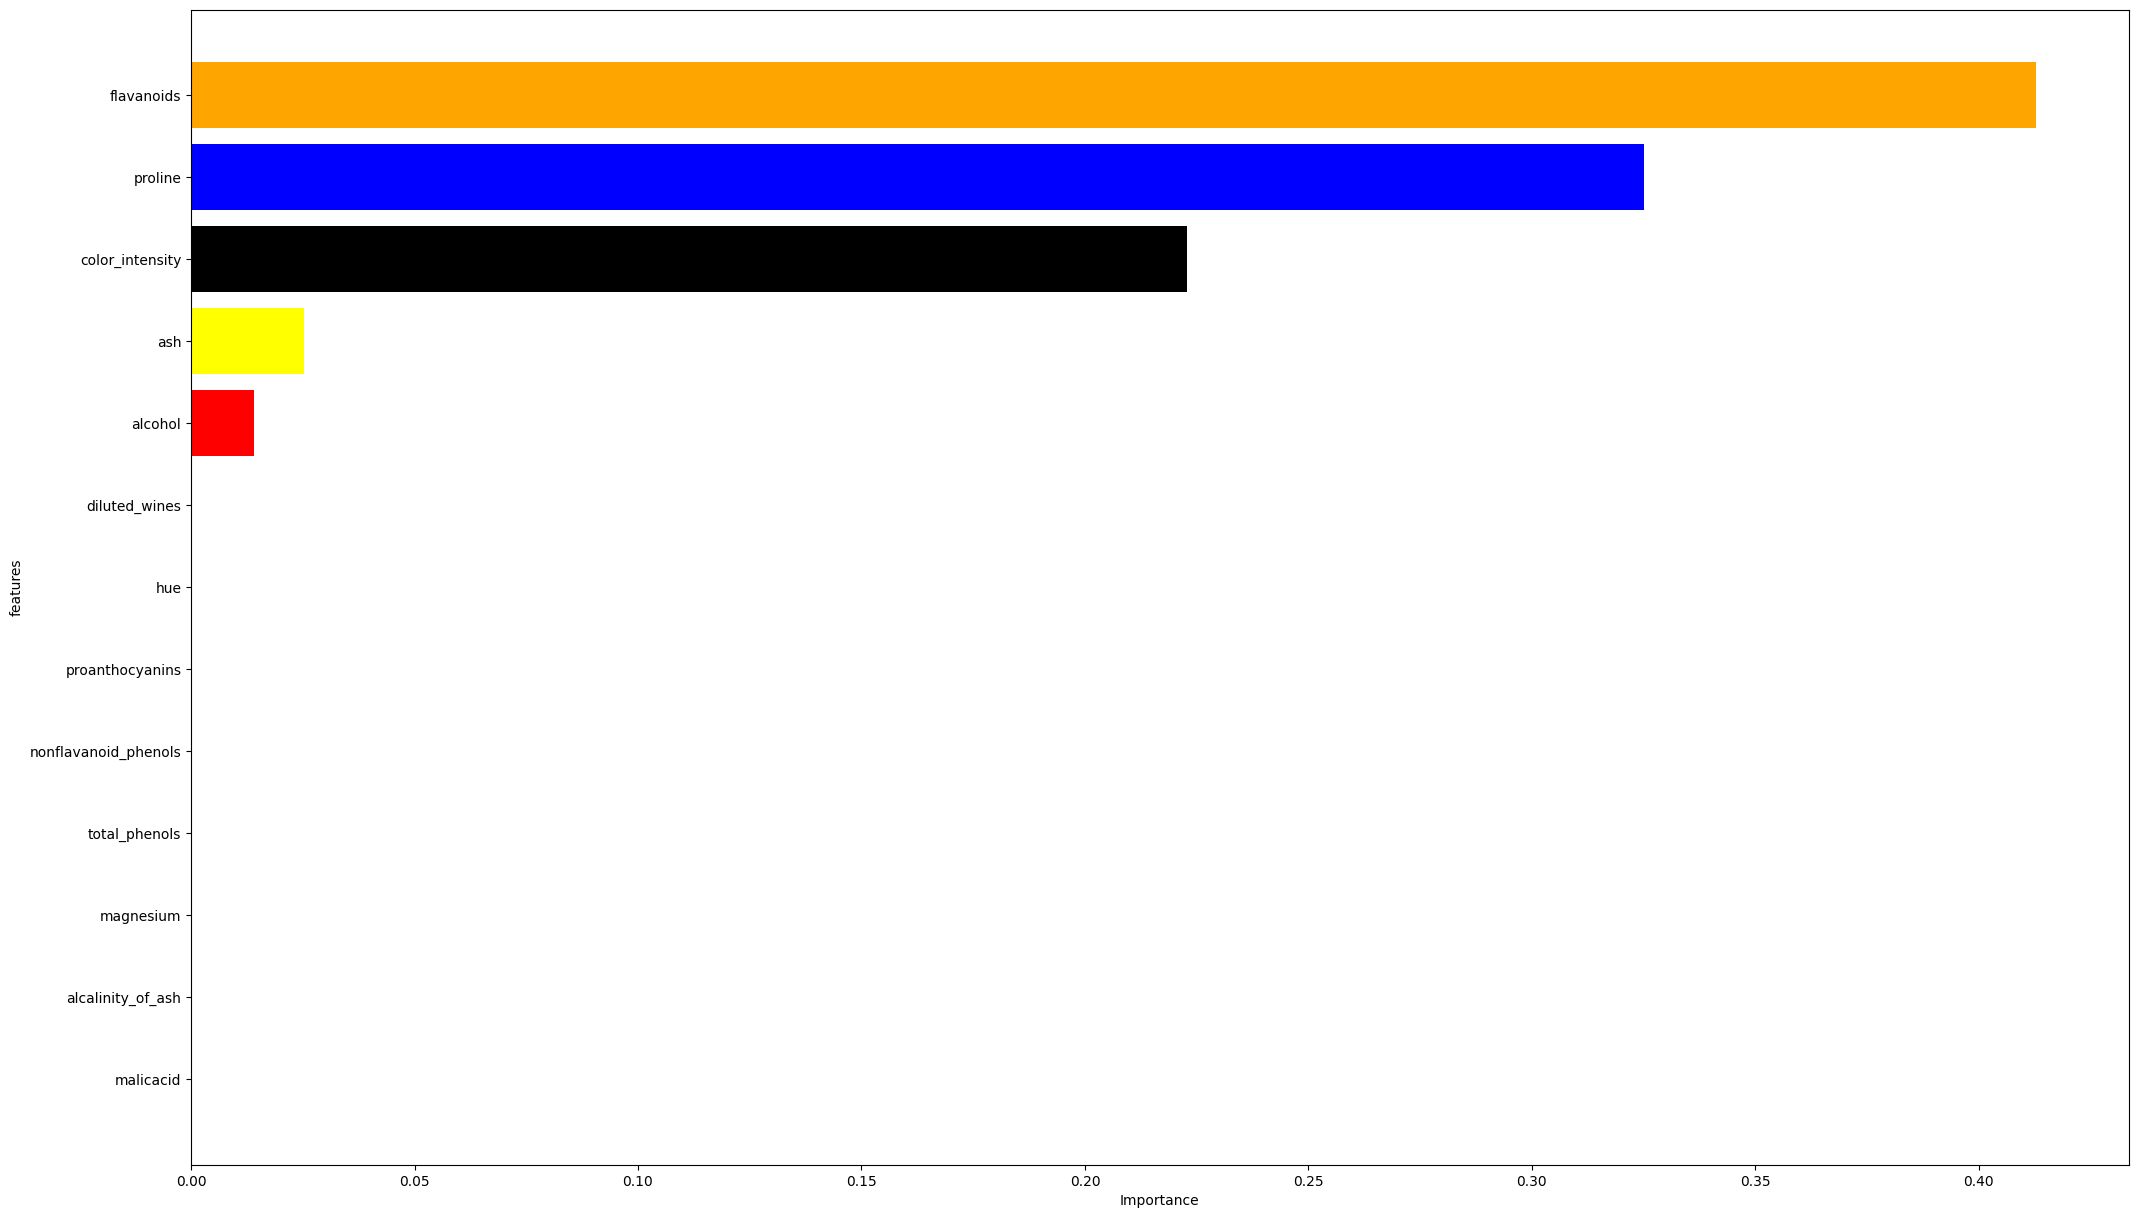

In [112]:
decision_tree = DecisionTreeClassifier(random_state=20, criterion = 'entropy')
decision_tree.fit(X,Y)
feature = []
imp = []
c = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink', 'purple']*5

for i,col in enumerate(df.drop('label',axis=1)):
    feature.append(col)
    imp.append(decision_tree.feature_importances_[i])

keydict = dict(zip(feature, imp))
feature.sort(key=keydict.get)
imp.sort()

fig = plt.figure(figsize = (25, 15))
plt.barh(feature, imp, color = c)

plt.ylabel("features")
plt.xlabel("Importance")
plt.show()

In [113]:
dataset2 = df.drop(['hue','magnesium', 'diluted_wines', 'proanthocyanins', 'nonflavanoid_phenols', 'total_phenols', 'alcalinity_of_ash', 'malicacid'], axis=1)

In [114]:
dataset2.head()

,label,alcohol,ash,flavanoids,color_intensity,proline
0,1,14.23,2.43,3.06,5.64,1065
1,1,13.20,2.14,2.76,4.38,1050
2,1,13.16,2.67,3.24,5.68,1185
3,1,14.37,2.50,3.49,7.80,1480
4,1,13.24,2.87,2.69,4.32,735


In [115]:
n3_dataset = pd.DataFrame()

for column in dataset2.columns:
    # Check if the column is numerical (excluding the 'label' column)
    if pd.api.types.is_numeric_dtype(dataset2[column]) and column not in ['label']:
        # Discretize the column
        n3_dataset[f'{column}'] = pd.cut(dataset2[column], bins=5, labels=False)

n3_dataset['label'] = dataset2['label']
n3_dataset.head()

,alcohol,ash,flavanoids,color_intensity,proline,label
0,4,2,2,1,2,1
1,2,2,2,1,2,1
2,2,3,3,1,3,1
3,4,3,3,2,4,1
4,2,4,2,1,1,1


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


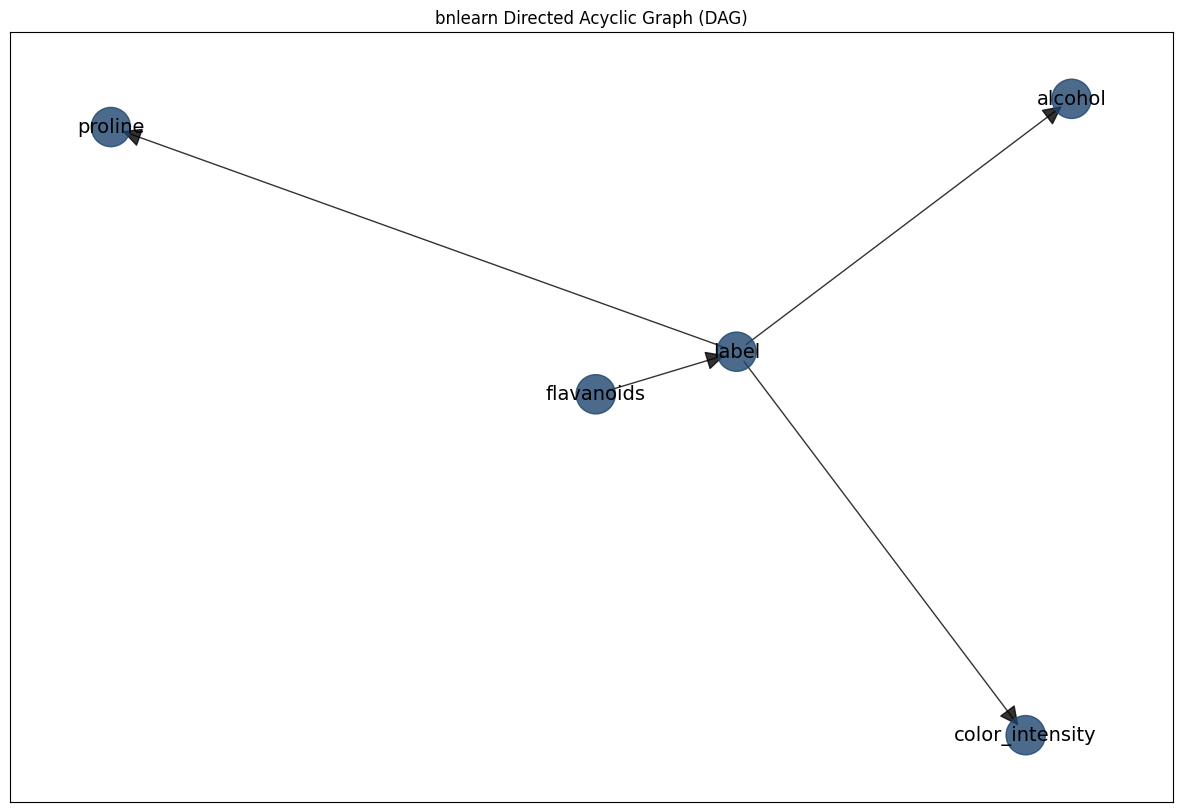

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.25140062, 0.67242286]),
  'ash': array([ 0.81157077, -0.17441697]),
  'flavanoids': array([-0.29019232, -0.10406044]),
  'color_intensity': array([ 0.19912106, -1.        ]),
  'proline': array([-0.84201726,  0.59825016]),
  'label': array([-0.12988288,  0.00780439])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ff6a7dcdca0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_size': 800},
  'flavanoids': {'node_color': '#1f456e', 'node_size': 800},
  'color_intensity': {'node_color': '#1f456e', 'node_size': 800},
  'proline': {'node_color': '#1f456e', 'node_size': 800},
  'label': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('flavanoids', 'label'): {'color': '#000000',
   'weight': 1},
  ('label', 'alcohol'): {'color': '#000000', 'weight': 1},
  ('label', 'color_intensity'): {'co

In [116]:
# Learn the structure of the Bayesian network
networkC = bn.structure_learning.fit(n3_dataset)
# Visualize the Bayesian network
bn.plot(networkC)


In [117]:
networkC = bn.parameter_learning.fit(networkC, n3_dataset)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of flavanoids:
+---------------+----------+
| flavanoids(0) | 0.213073 |
+---------------+----------+
| flavanoids(1) | 0.206282 |
+---------------+----------+
| flavanoids(2) | 0.224109 |
+---------------+----------+
| flavanoids(3) | 0.185908 |
+---------------+----------+
| flavanoids(4) | 0.170628 |
+---------------+----------+
[bnlearn] >CPD of label:
+------------+---------------------+-----+---------------------+
| flavanoids | flavanoids(0)       | ... | flavanoids(4)       |
+------------+---------------------+-----+---------------------+
| label(1)   | 0.26560424966799473 | ... | 0.3316749585406302  |
+------------+---------------------+-----+---------------------+
| label(2)   | 0.29349269588313415 | ... | 0.33665008291873966 |
+------------+---------------------+-----+

## Posterior probabilities

In [118]:
query1 = bn.inference.fit(networkA, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0})
print(query1)
query2 = bn.inference.fit(networkA, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0, 'proline' :0})
print(query2)
query3 = bn.inference.fit(networkA, variables=['label'], evidence={'flavanoids': 2, 'color_intensity': 0, 'proline' :0})
print(query3)
query4 = bn.inference.fit(networkA, variables=['label'], evidence={'alcohol': 0, 'proline' :1})
print(query4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.205712 |
+----+---------+----------+
|  1 |       2 | 0.586854 |
+----+---------+----------+
|  2 |       3 | 0.207434 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.2057 |
+----------+--------------+
| label(2) |       0.5869 |
+----------+--------------+
| label(3) |       0.2074 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.144967 |
+----+---------+----------+
|  1 |       2 | 0.661321 |
+----+---------+----------+
|  2 |       3 | 0.193711 |


In [119]:
query1 = bn.inference.fit(networkB3, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0})
print(query1)
query2 = bn.inference.fit(networkB3, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0, 'proline' :0})
print(query2)
query3 = bn.inference.fit(networkB3, variables=['label'], evidence={'flavanoids': 2, 'color_intensity': 0, 'proline' :0})
print(query3)
query4 = bn.inference.fit(networkB3, variables=['label'], evidence={'alcohol': 0, 'proline' :1})
print(query4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.318175 |
+----+---------+----------+
|  1 |       2 | 0.41491  |
+----+---------+----------+
|  2 |       3 | 0.266915 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.3182 |
+----------+--------------+
| label(2) |       0.4149 |
+----------+--------------+
| label(3) |       0.2669 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.24041  |
+----+---------+----------+
|  1 |       2 | 0.494456 |
+----+---------+----------+
|  2 |       3 | 0.265134 |


In [120]:
query1 = bn.inference.fit(networkC, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0})
print(query1)
query2 = bn.inference.fit(networkC, variables=['label'], evidence={'alcohol': 1, 'flavanoids': 1, 'color_intensity': 0, 'proline' :0})
print(query2)
query3 = bn.inference.fit(networkC, variables=['label'], evidence={'flavanoids': 2, 'color_intensity': 0, 'proline' :0})
print(query3)
query4 = bn.inference.fit(networkC, variables=['label'], evidence={'alcohol': 0, 'proline' :1})
print(query4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.155603 |
+----+---------+----------+
|  1 |       2 | 0.65986  |
+----+---------+----------+
|  2 |       3 | 0.184537 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.1556 |
+----------+--------------+
| label(2) |       0.6599 |
+----------+--------------+
| label(3) |       0.1845 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.106739 |
+----+---------+----------+
|  1 |       2 | 0.735673 |
+----+---------+----------+
|  2 |       3 | 0.157588 |


In [121]:
query1 = bn.inference.fit(networkA, variables=['label'], evidence={'alcohol': 0, 'flavanoids': 0, 'color_intensity': 0})
print(query1)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.213143 |
+----+---------+----------+
|  1 |       2 | 0.453309 |
+----+---------+----------+
|  2 |       3 | 0.333548 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.2131 |
+----------+--------------+
| label(2) |       0.4533 |
+----------+--------------+
| label(3) |       0.3335 |
+----------+--------------+


In [122]:
query1 = bn.inference.fit(networkB1, variables=['label'], evidence={'alcohol': 0, 'flavanoids': 0, 'color_intensity': 0})
print(query1)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: Inference requires BayesianNetwork. hint: try: parameter_learning.fit(DAG, df, methodtype="bayes") <return>
None


In [123]:
query1 = bn.inference.fit(networkC, variables=['label'], evidence={'alcohol': 0, 'flavanoids': 0, 'color_intensity': 0})
print(query1)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   label |        p |
+====+=========+==========+
|  0 |       1 | 0.204121 |
+----+---------+----------+
|  1 |       2 | 0.447655 |
+----+---------+----------+
|  2 |       3 | 0.348224 |
+----+---------+----------+
+----------+--------------+
| label    |   phi(label) |
+==========+==============+
| label(1) |       0.2041 |
+----------+--------------+
| label(2) |       0.4477 |
+----------+--------------+
| label(3) |       0.3482 |
+----------+--------------+
